# Alucar - Analisando as Vendas

In [191]:
# importando as biblioteca
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

In [192]:
#importando dataset e visualizando
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [193]:
# verificando o tamanho do nosso dataset
print("Quantidade de linhas e colunas:", alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [194]:
# Verificando a quantidade de dados nulos no total
print("Quantidade de dados nulos: ", alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [195]:
# vendo o tipo dos dados
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [196]:
# Precisamos deixaar o tipo da variavel mes para datetime
alucar.mes = pd.to_datetime(alucar.mes)

In [197]:
# visualizando
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Agora sim, esta em datetime

<AxesSubplot:xlabel='mes', ylabel='vendas'>

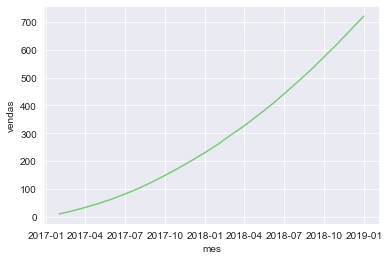

In [198]:
# Vamos analisar se as vendas estao subindo ou nao 
sns.lineplot(x='mes', y='vendas', data=alucar)

Visulizando, podemos observar que as vendas subiram 

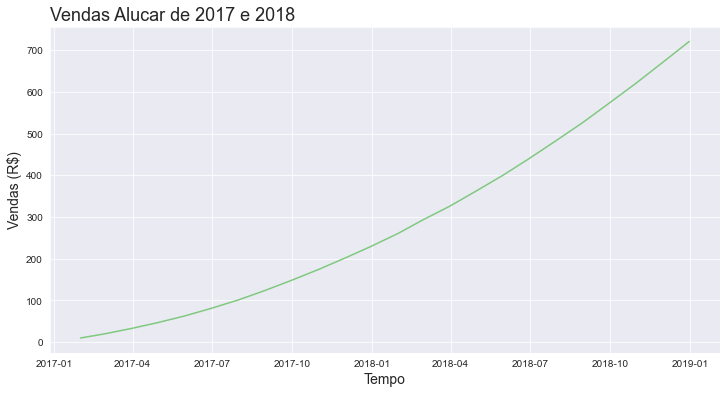

In [199]:
# Melhoradno o grafico
sns.set_palette('Accent') # cor da linha
sns.set_style('darkgrid') # cor do fundo
ax = sns.lineplot(x='mes', y='vendas', data=alucar) # atribuindo a o grafico a variavel ax
ax.figure.set_size_inches(12,6) # tamanho
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize= 18) # titulo
ax.set_xlabel('Tempo', fontsize=14) #eixo x
ax.set_ylabel('Vendas (R$)', fontsize=14) #eixo y
ax = ax # pra sumir o subtile em cima

#### !!Para saber mais: 

**time series  é uma coleção de observações ou dados, geralmente feita através de um tempo sequencial, que pode ser segundos, minutos, dias, meses, anos, entre outros**

In [200]:
# visualizando as 5 primeiras linhas 
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [201]:
# criando uma nova variavel aumento e atribuindo o valor de vendas
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


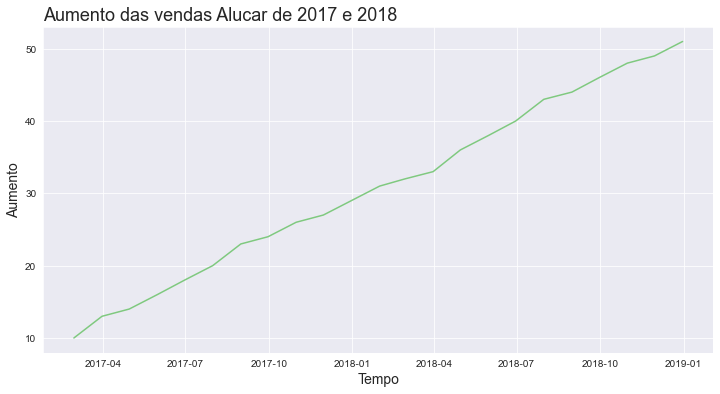

In [202]:
# plotando grafico com a variavel aumento 
sns.set_palette('Accent') # cor da linha
sns.set_style('darkgrid') # cor do fundo
ax = sns.lineplot(x='mes', y='aumento', data=alucar) # atribuindo a o grafico a variavel ax
ax.figure.set_size_inches(12,6) # tamanho
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize= 18) # titulo
ax.set_xlabel('Tempo', fontsize=14) #eixo x
ax.set_ylabel('Aumento', fontsize=14) #eixo y
ax = ax # pra sumir o subtile em cima

Comparando mês a mês a alucar esta vendendo mais tambem

In [203]:
# Criando uma função plotar para facilitar no processo de output de grafico
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent') # cor da linha
    sns.set_style('darkgrid') # cor do fundo
    ax = sns.lineplot(x=x, y=y, data=dataset) # atribuindo a o grafico a variavel ax
    ax.figure.set_size_inches(12,6) # tamanho
    ax.set_title(titulo, loc='left', fontsize= 18) # titulo
    ax.set_xlabel(labelx, fontsize=14) #eixo x
    ax.set_ylabel(labely, fontsize=14) #eixo y
    ax = ax # pra sumir o subtile em cima

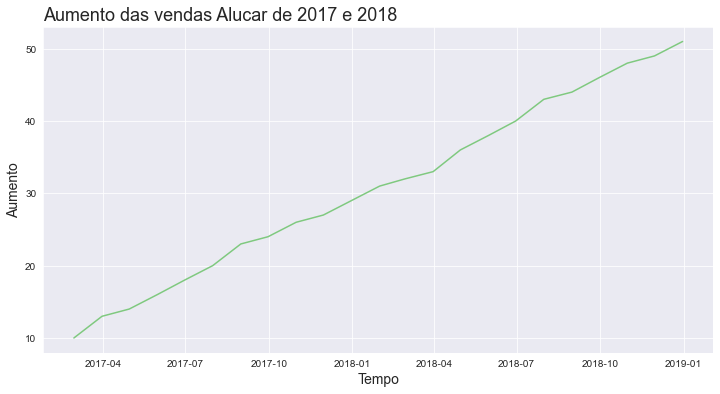

In [204]:
plotar('Aumento das vendas Alucar de 2017 e 2018', 'Tempo','Aumento','mes', 'aumento', alucar )

In [205]:
# Criando nova coluna aceleração
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


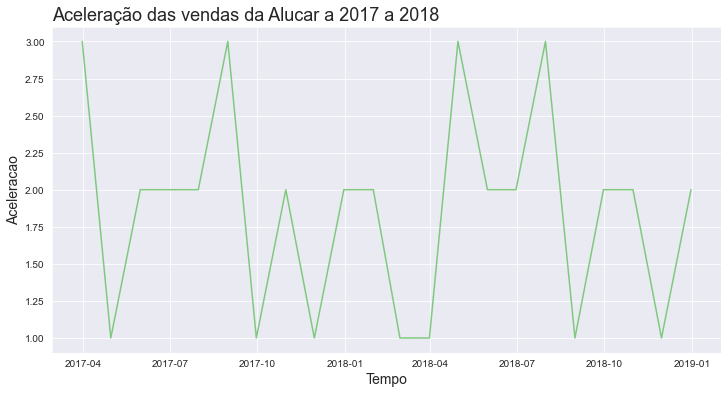

In [206]:
#visualizando o grafico
plotar('Aceleração das vendas da Alucar a 2017 a 2018','Tempo','Aceleracao','mes', 'aceleracao', alucar  )

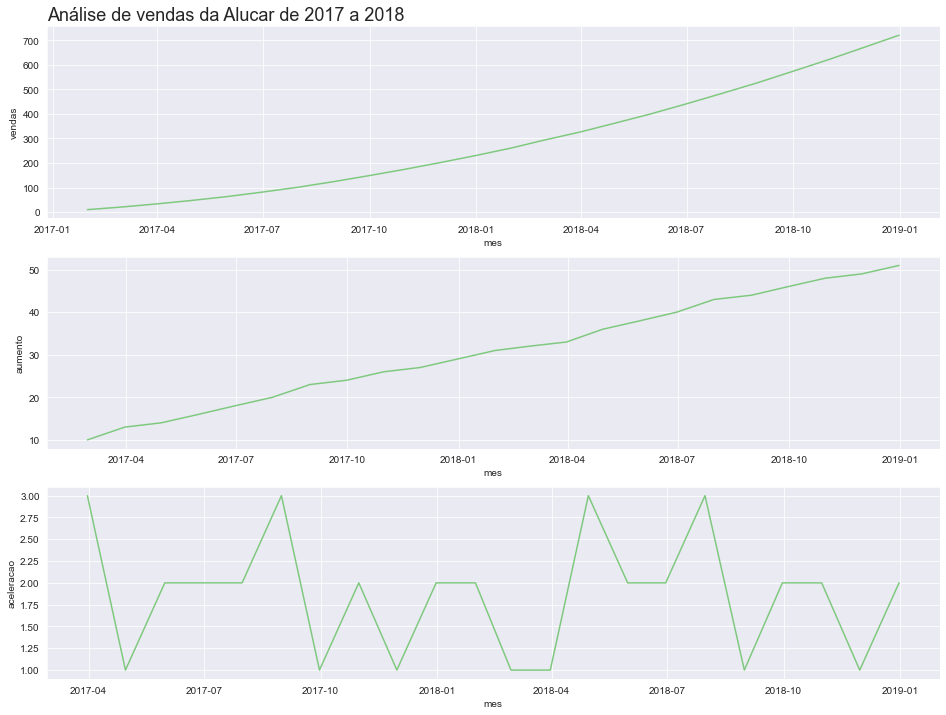

In [207]:
# Plotanto os tres graficos em um output
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar) # atribuindo a o grafico a variavel ax
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [208]:
# Criando uma nova função para caso de comparação de graficos
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=dataset) # atribuindo a o grafico a variavel ax
    plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

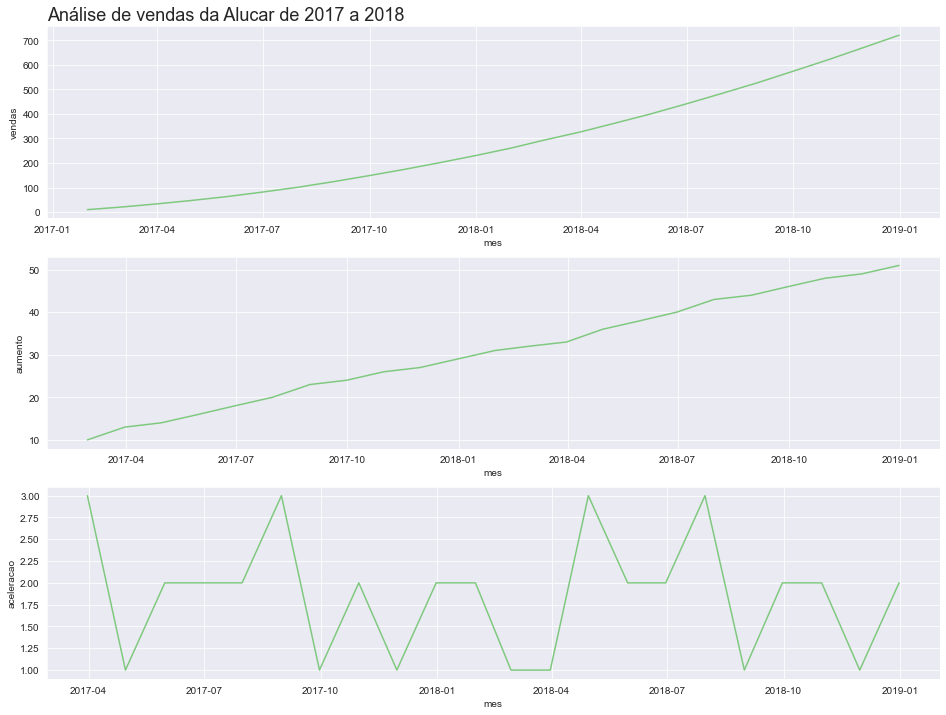

In [209]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da Alucar de 2017 a 2018')

Tendência que o número de vendas esta aumentando,em vendas a mesma coisa crescendo em mês e mês e a aceleracao sempre positiva

## Autocorrelação

In [210]:
# importando a bilbioteca necessária para correlação
from pandas.plotting import autocorrelation_plot

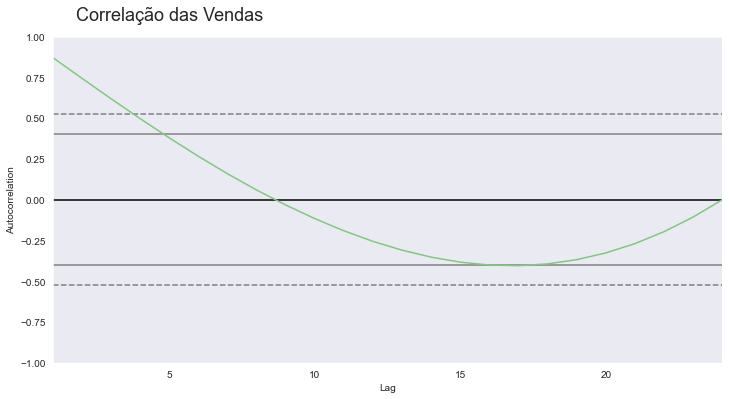

In [211]:
# visualizando a autcorrelação da variavel vendas 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

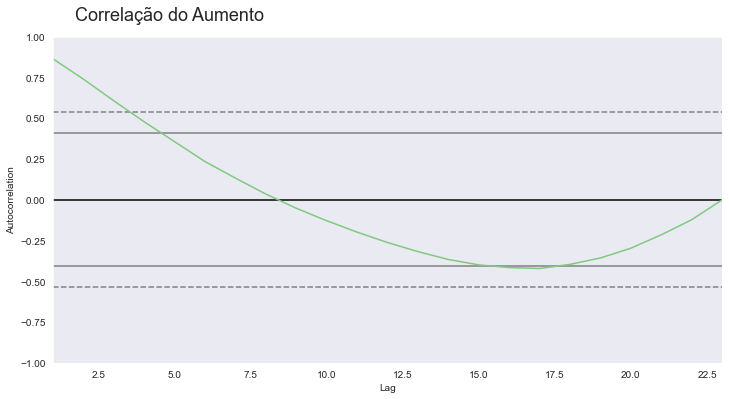

In [212]:
# visualizando a autcorrelação do aumento vendas 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:]) # informando o indice um, pois o 0 nao tem nenhum valor
ax = ax

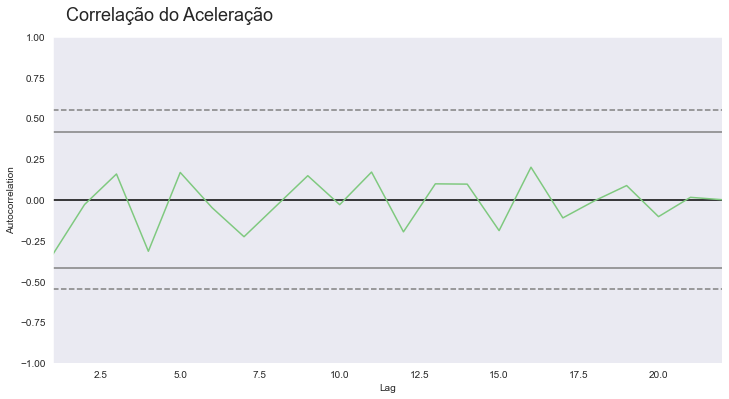

In [213]:
# visualizando a autcorrelação da aceleração das vendas 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:]) # informando o indice 2, pois o 0 nao tem nenhum valor
ax = ax

Podemos entender que os 7 primeiros dias parece ter uma ligação muito forte com os da semana passada. E com passar do tempo ela decresce, dos lag ela decresce

## 1	correlação perfeita positiva
## 0,7 a 0,9	correlação forte
## 0,4 a 0,7	correlação moderada
## 0,2 a 0,4	correlação fraca
## 0	correlação nula
## < 0	correlação negativa
## -1	correlação perfeita negativa

# Alucar - Analisando assinantes da newsletter

In [214]:
# lendo o arquivo
assinantes = pd.read_csv("newsletter_alucar.csv")
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [215]:
#visualizando o tipo das variaveis
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [216]:
# visualizando o tamanho do dataset
# visualizando se ha dados nulos no total
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos: 0


In [217]:
# convertendo a variavel mes para datetime
assinantes.mes = pd.to_datetime(assinantes['mes'])

In [218]:
# visualizando o tipo das variaveis
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [219]:
# criando nova variavel aumento e aceleração e descobrindo os valores
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [220]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


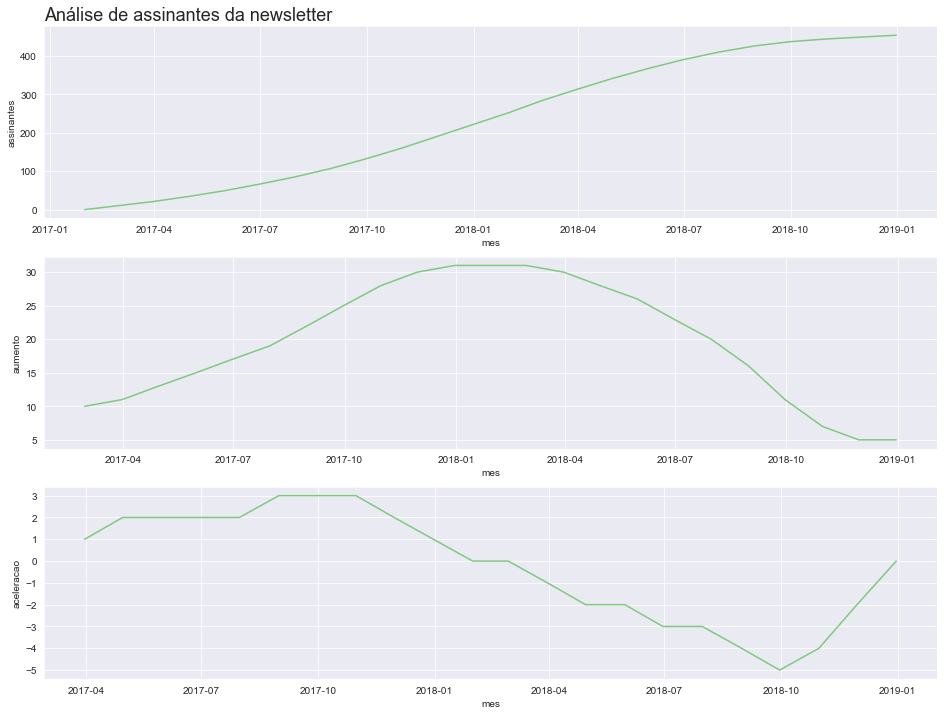

In [221]:
# protando grafico de analise
# Primeiro detalha o crescimento de assinantes
# Segundo aumento e decréscimo de mês em mês
# Terceiro aumento da aceleracao porém cai drasticamente e no final subiu
plot_comparacao('mes', 'assinantes', 'aumento','aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Dataset Chocolura

## Analise de vendas

In [222]:
# visualizando dataset
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [223]:
# vendo o tipo das variaveis
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [224]:
# convertendo a variavvel mes para datetime
chocolura.mes = pd.to_datetime(chocolura.mes)

In [225]:
# visualizando o tipo
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [226]:
# Verificando o tamanho dos dados
# E o total de observações nulas
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [227]:
# criando duas variaveis com respectivos valores de  aumento das venda e aceleracao
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

In [228]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


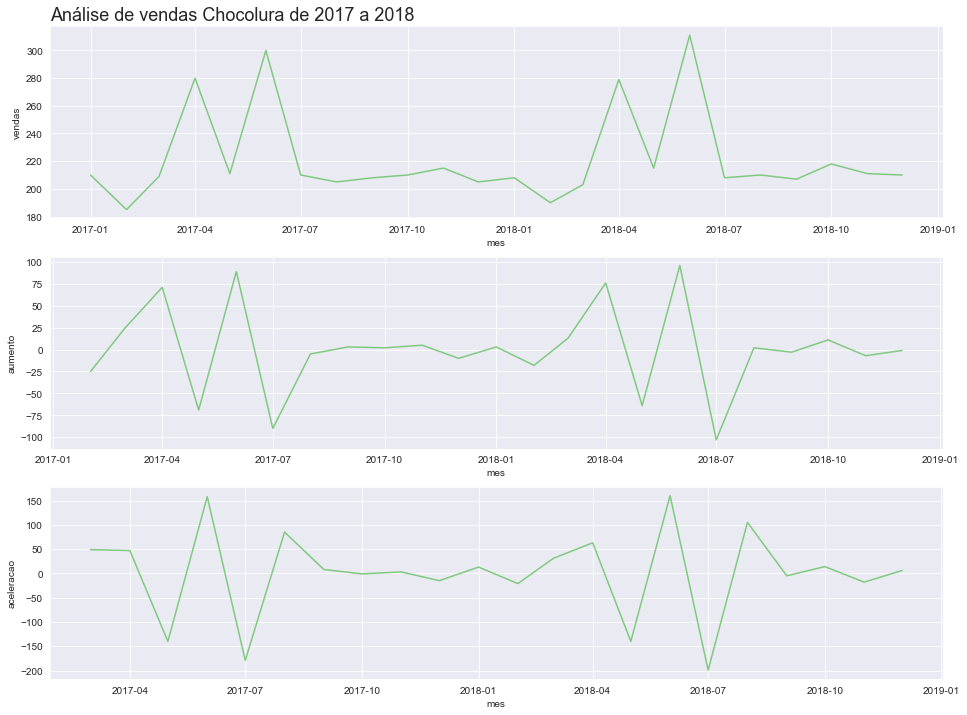

In [229]:
# Plotando os tres graficos
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas Chocolura de 2017 a 2018')

No primeiro grafico podemos analiser uma possivel sazonalizade. Por exempo nos respectivos mÊs 4 e 6 sempre aumenta das vendas.
No segundo e terceiro grafico retratam o mesmo cenário. Aumento e aceleracao ocorrem nos respectivos mês 4 e 6 dos anos de 2017 e 2018



# Chocolura - Vendas diárias(outubro e novembro)

In [230]:
# importando dataset e visulizando
vendas_por_dia = pd.read_csv("vendas_por_dia.csv")
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [231]:
# verificando o tamanho do dataset
# verificando o total de observações nulas
print('Quantidade de linnhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linnhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [232]:
# verificando o tipo das variaveis
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [233]:
# Convertendo a variavel dia em datetime
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [234]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [235]:
# Criando duas variaveis aumento e acelerecao 
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

In [236]:
# visualizando
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


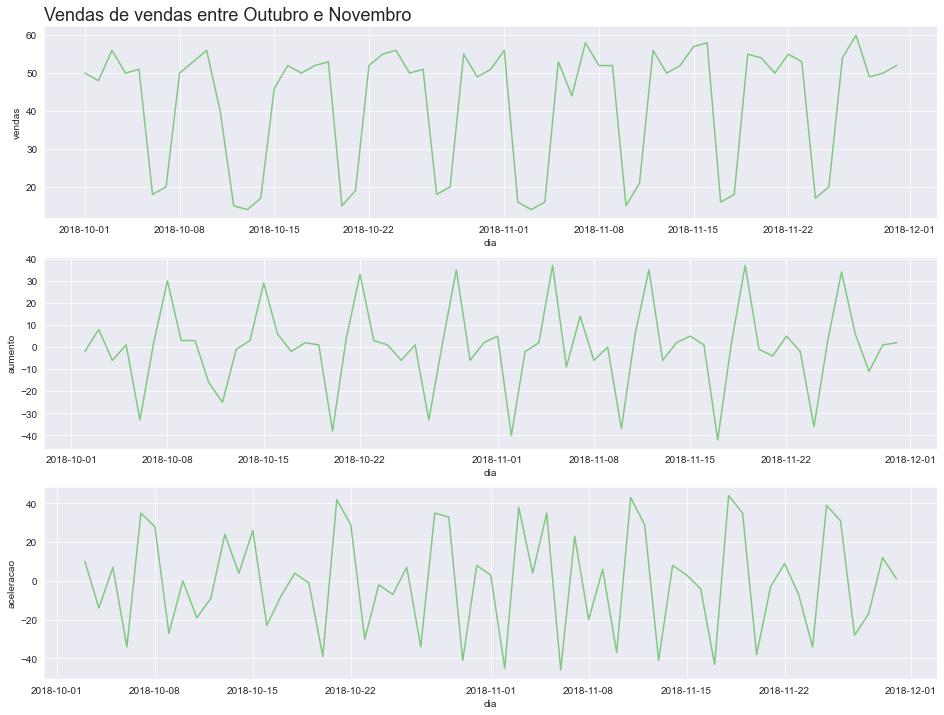

In [237]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Vendas de vendas entre Outubro e Novembro')

# Analisando a Sazonalidade

In [238]:
# Vamos entender quais da semana os picos dos graficos estao se refereindo
# Pra isso, vamos criar uma nova coluna do dia, com a  função dt day name
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.day_name()

In [239]:
# visualizando os dias
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


### Traduzir o nome dos dias


In [240]:
# verificando quais dias temos na base
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [241]:
# Criando um diciionario com a tradução dos dias
dias_traduzidos = {'Monday': 'Segunda', 
                    'Tuesday': 'Terça', 
                    'Wednesday': 'Quarta', 
                    'Thursday': 'Quinta', 
                    'Friday': 'Sexta', 
                    'Saturday': 'Sabado',
                    'Sunday': 'Domingo'}

In [242]:
# Atribuindo os novos valores com map na variavel dia da semana
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


### Agrupando os dias

In [243]:
# criando uma nova variavel que vai receber a média dos dias  arredondadas, agrupados das respectivas variaveis vendas, aumento e aceleracao 
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


Podemos observar que as quedas ocorrem soemnte no final de semana, agora durante semana a média de vendas é 50

## Correlação das vendas diárias 

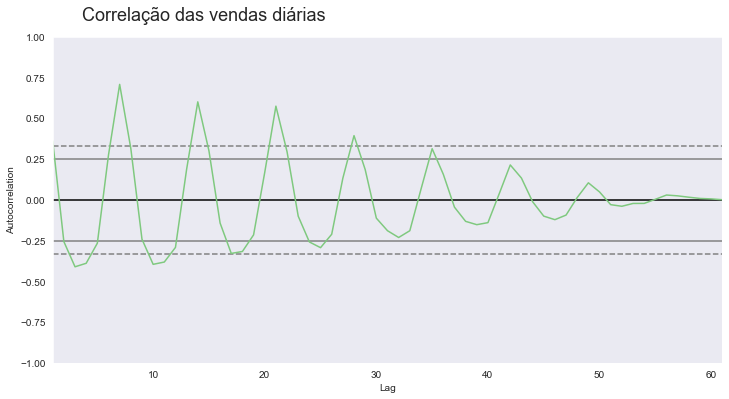

In [244]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax = ax

### Correlação do aumento da vendas

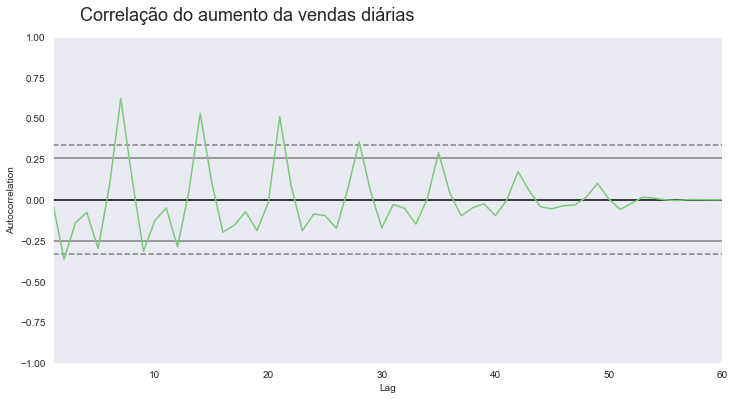

In [245]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento da vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:]) # começando pelo indice 1, pois o 0 é nulo
ax = ax

### Correlação da aceleração das vendas

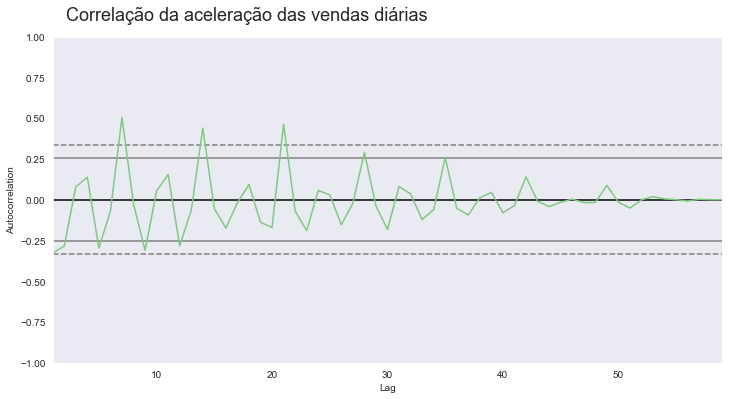

In [246]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:]) # começando pelo indice 2, pois o 0e 1 é nulo
ax = ax

Podemos visualizar que ha sim uma correlação entre vendas, aumento e aceleracao 

# Cafelura - Análise de vendas

In [247]:
# lendo os dados
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [248]:
# vendo o tamanho da base de dados
# e quantidade total de dados nulos
print('Quantidade total de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade total de linhas e colunas: (24, 2)
Quantidade de dados nulos:  0


In [249]:
# visualizando o tipo das variaveis
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [250]:
# convertendo mes para datetime
cafelura.mes = pd.to_datetime(cafelura.mes)

In [251]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

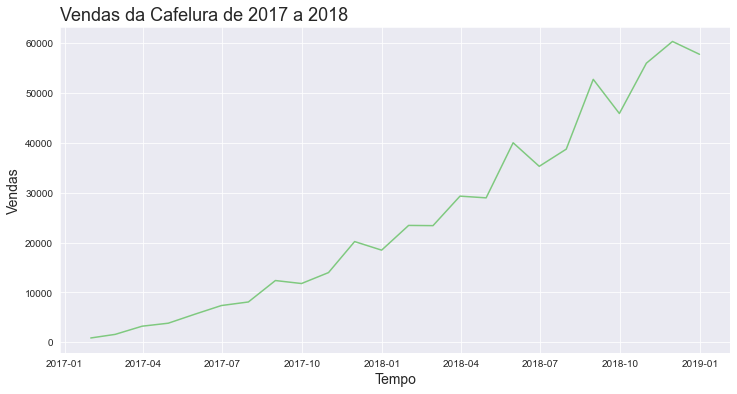

In [252]:
# Plotando os graficos
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

Observando parece que as vendas estao crescentes

### Normalização 

In [253]:
# importando dataset
quantidade_de_dias_de_fds= pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [254]:
# vendo somente os valores 
quantidade_de_dias_de_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [255]:
# criando uma nova varivel vendas normalizadas, que seria a vendas da cafelura divido pela quantidade de dias de fds
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_de_dias_de_fds.quantidade_de_dias.values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


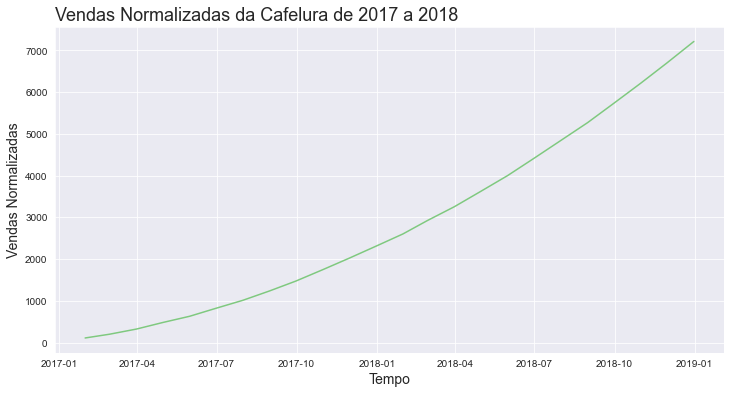

In [256]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

Agora um grafico de vendas, somente com dias úteis. Nesse caso o grafico tambem é crescente

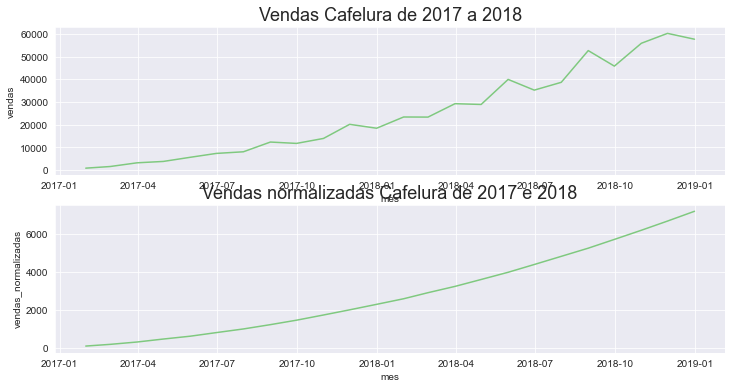

In [265]:
# Plotando os dois graficos

plt.figure(figsize=(12,6))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura de 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [266]:
# importando a biblioteca e fução
from statsmodels.tsa.seasonal import seasonal_decompose

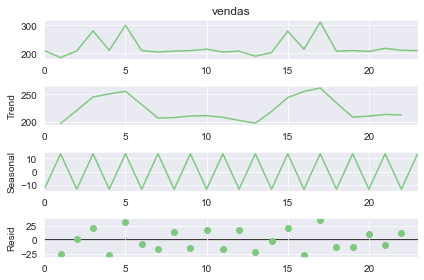

In [278]:
# plotando
resultado = seasonal_decompose(chocolura['vendas'], period=2)
ax = resultado.plot()

O primeiro mostra as vendas observadas 

Segundo a tedências das vendas 

Terceiro sazonal de vendas 

Quarto ruído dos dados

In [288]:
# Armazadendo cada lista em uma variavel
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [290]:
# criando um novo dataframe com as novas variaveis
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


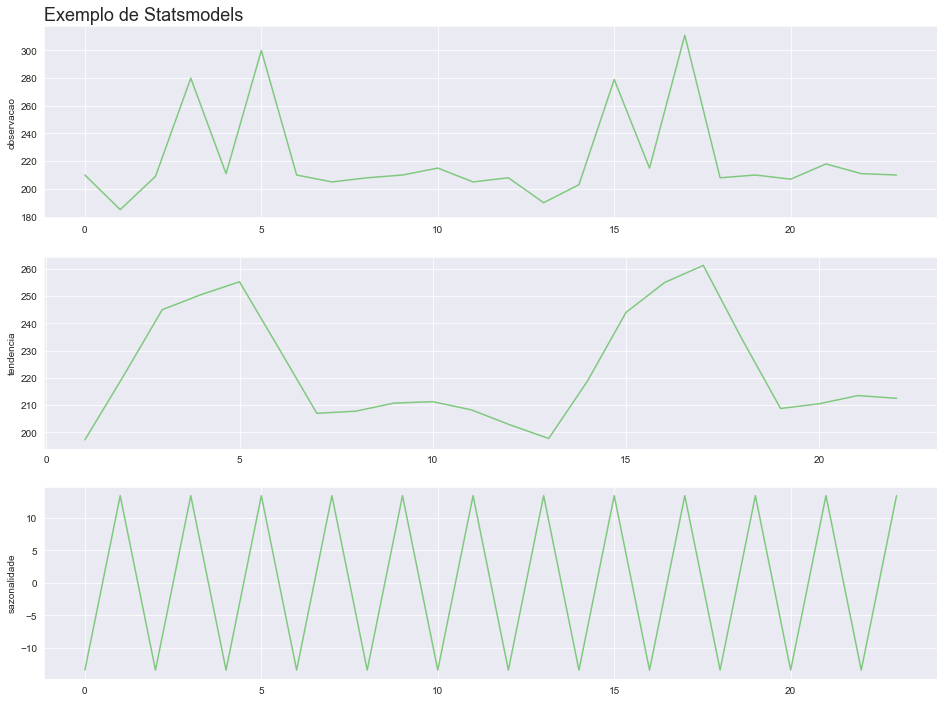

In [292]:
# Plotados os graficos
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',  resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [293]:
# lendo os dados
# visualizando
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [294]:
# vendo o tipo
alucel.dtypes


dia        object
vendas    float64
dtype: object

In [299]:
# convertendo dia em datetime
alucel.dia = pd.to_datetime(alucel.dia)

In [300]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [303]:
# verificando se qual tamanho da base e se tem dados nulos
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [306]:
# Criando duas variavels aumento e aceleracao das vendas
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()

In [307]:
# visualizando
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


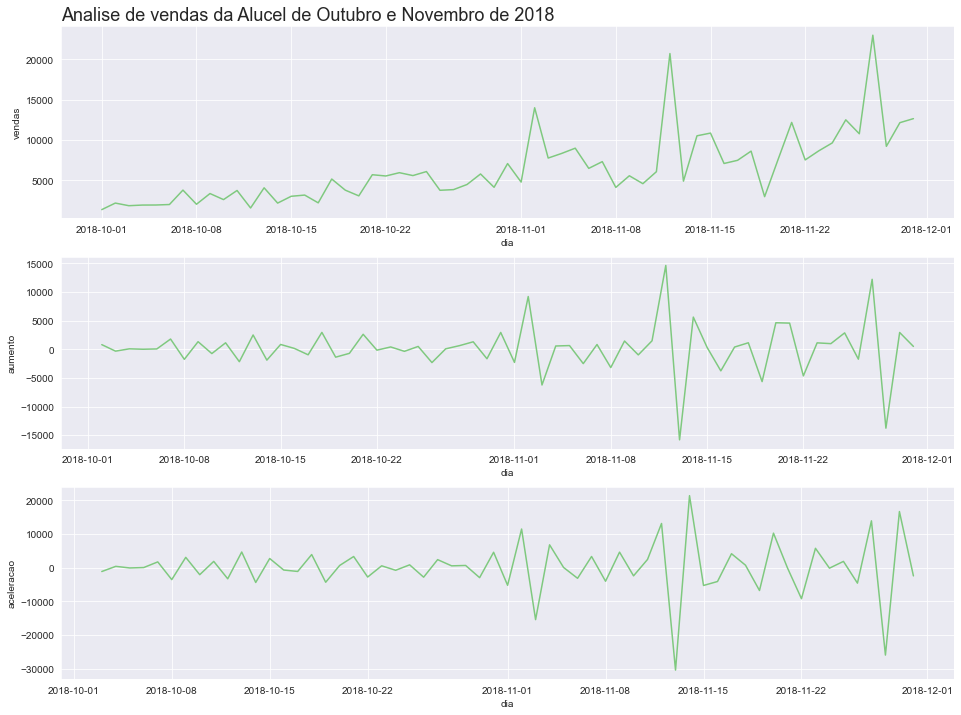

In [309]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analise de vendas da Alucel de Outubro e Novembro de 2018')

Podemos visualizar que ha muito ruído em ambos os graficos. Nesse caso vamos normalizar com a média movel.

## Média móvel

In [311]:
# criand nova coluna media movel
# usando a função rolling e especificando que querremos de 7 dias a media
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [313]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


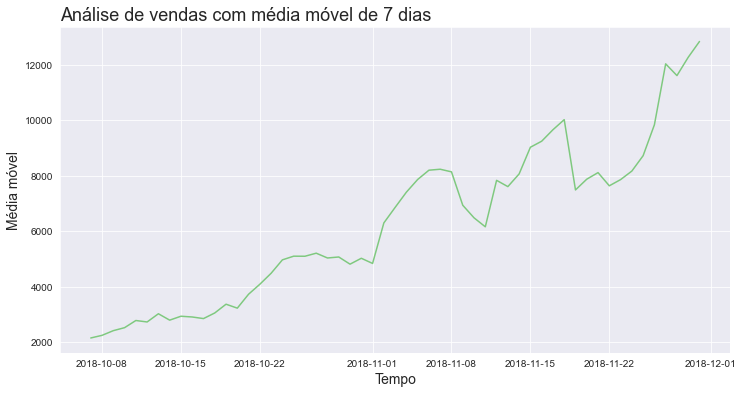

In [315]:
# plotando os graficos
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [316]:
# criando uma nova media movel porém de 21 dias
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()

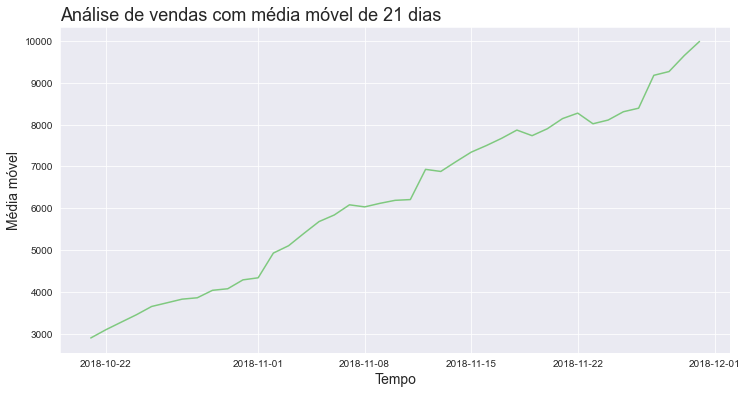

In [318]:
# Plotando
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

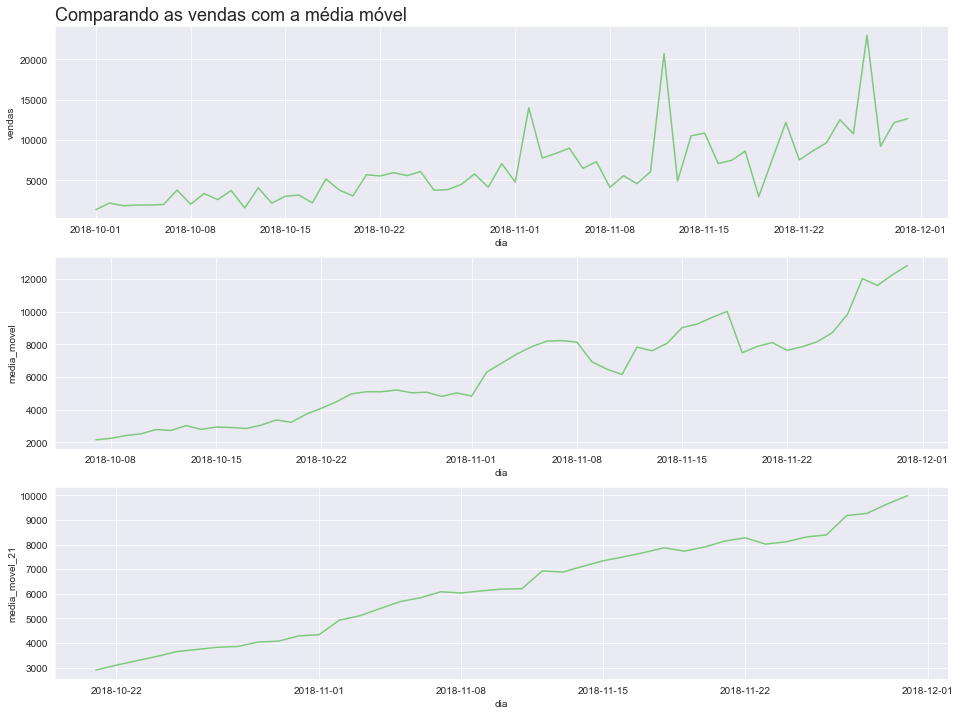

In [319]:
# plotandos os tres garficos
plot_comparacao('dia','vendas','media_movel', 'media_movel_21', alucel, 'Comparando as vendas com a média móvel')

Primeiro grafico podemos visualizar com bastante ruido

segundo ja normalizamos com media movel de 7 dias, podemos observar melhor durante 7 dias a media das vendas

terceiro com media movel de 21 dias, deu um super normalizada da media das vendas